# Preprocessing

In [21]:
import seaborn as sns
import pandas as pd
import missingno as msno

In [22]:
titanic = sns.load_dataset("titanic")

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<AxesSubplot:>

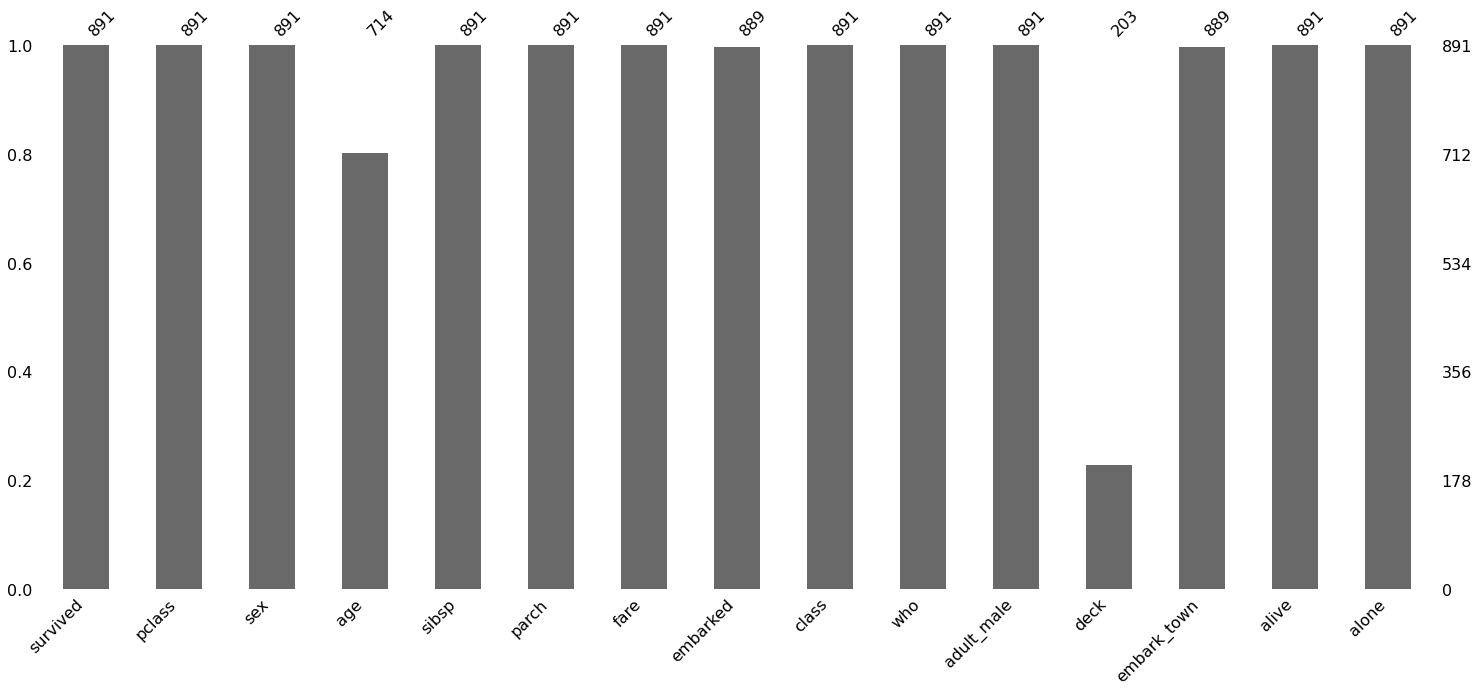

In [24]:
# Gives a bar chart of the missing values
msno.bar(titanic)

<AxesSubplot:>

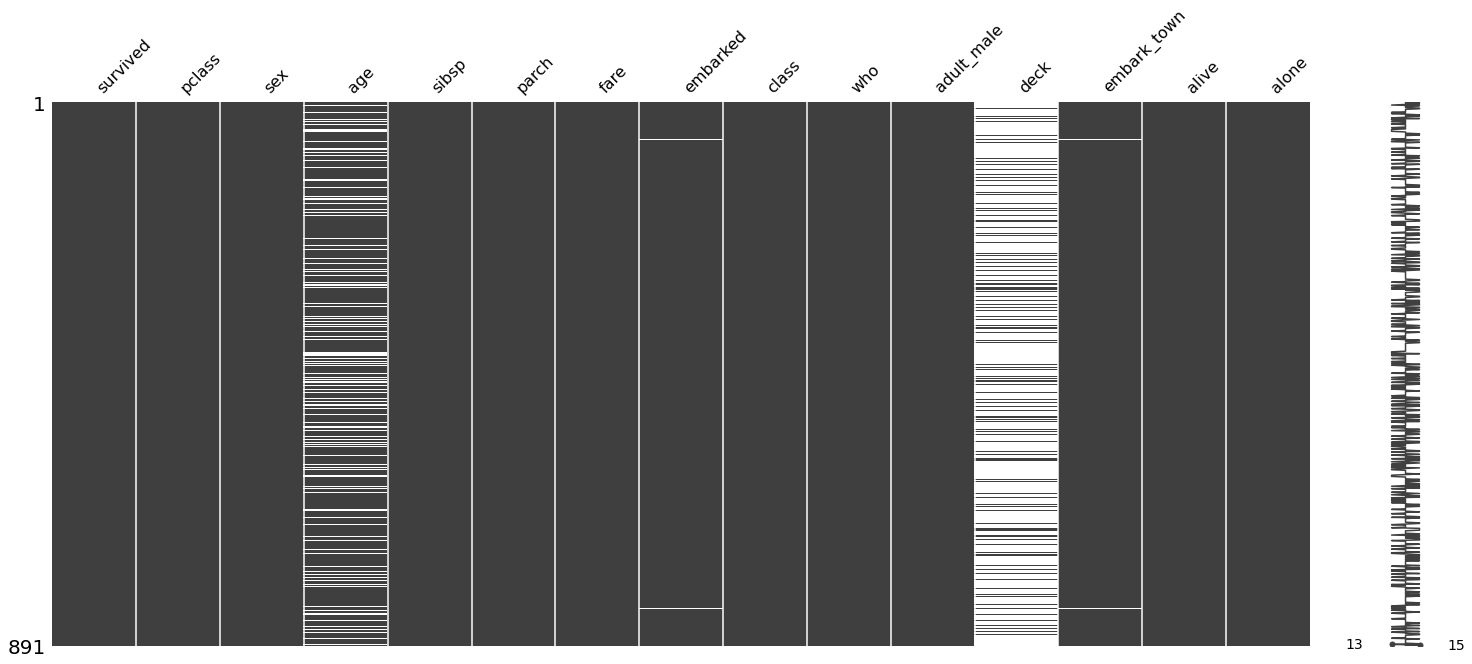

In [25]:
# Gives positional information of the missing values
msno.matrix(titanic)

<AxesSubplot:>

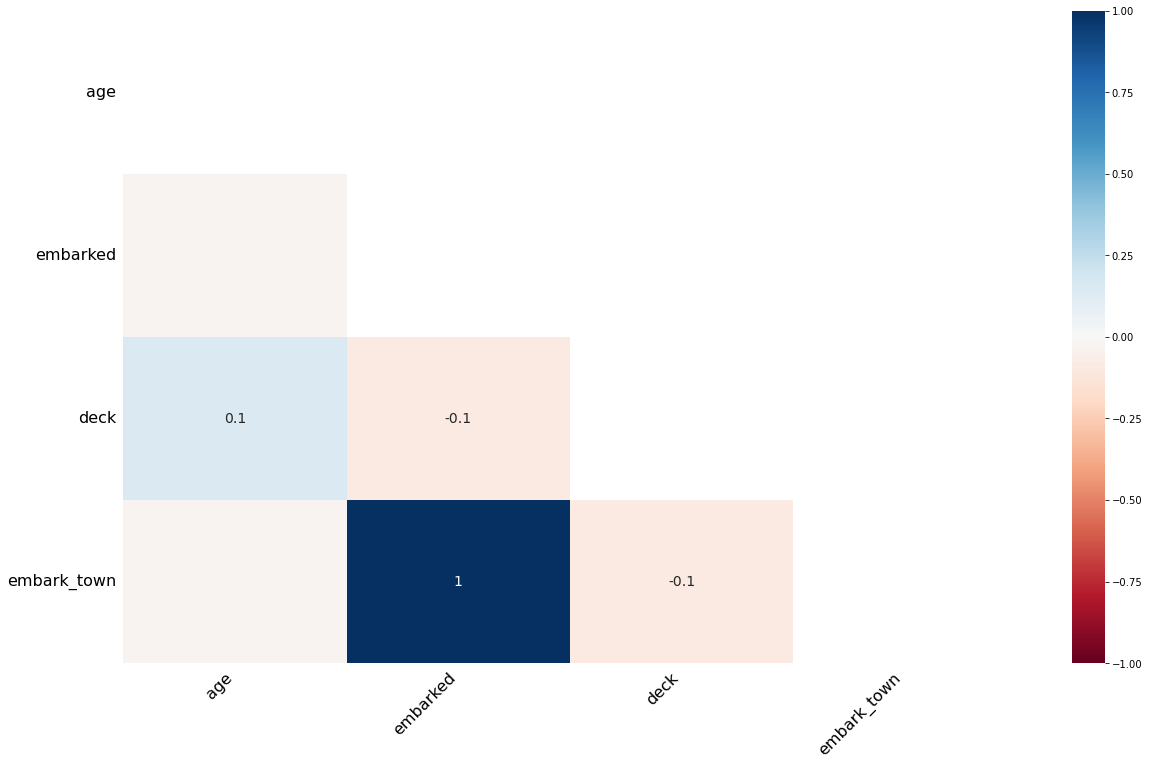

In [26]:
# Gives a heatmap of how missing values are related
msno.heatmap(titanic)

In [27]:
titanic_new=titanic.drop("deck",axis=1)

In [28]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(titanic_new)
titanic_new=enc.transform(titanic_new)

In [29]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
titanic_clean=imputer.fit_transform(titanic_new)

<AxesSubplot:>

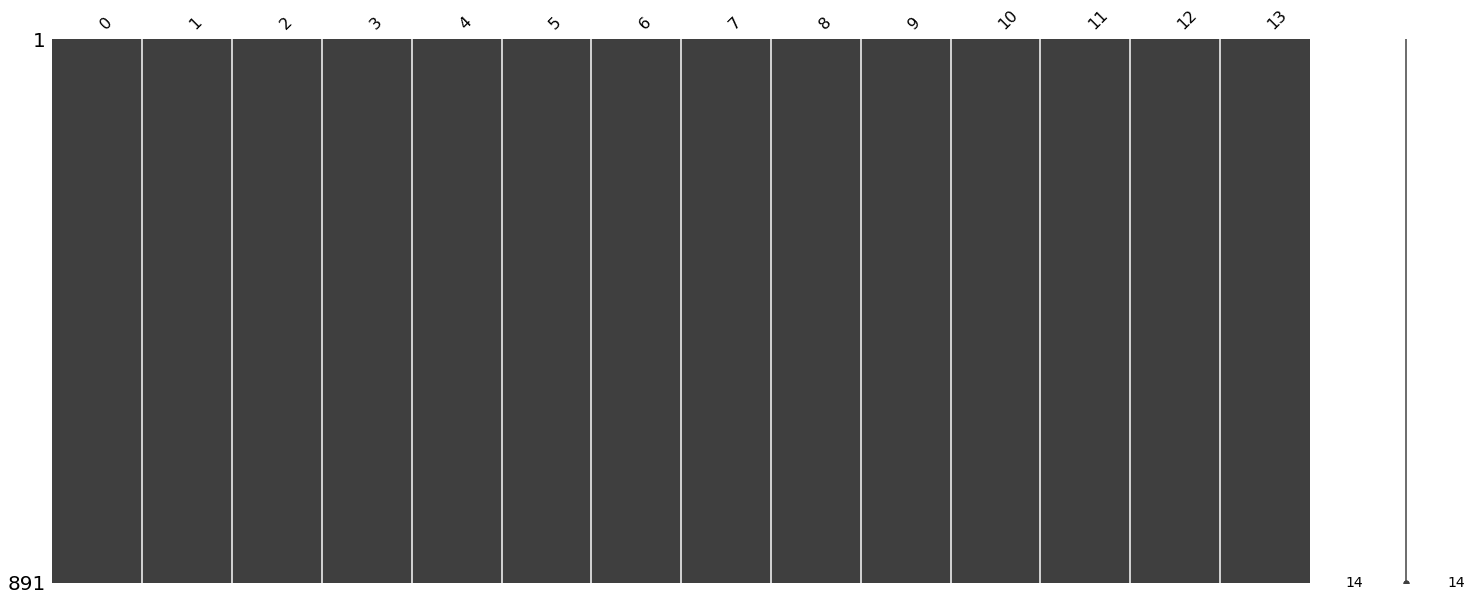

In [30]:
msno.matrix(pd.DataFrame(titanic_clean))

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as pline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

In [49]:
df = pd.read_csv('D:/Komputasi Statistika 2/Preprocessing/train_edit1.csv',header=0)

df.describe()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
count,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000
mean,1.430970,1.347829,1.034331,1.736126,1985.860360,0.993604,2.548995,2009.205856,6.240360,3.708018,3.496306,1.200090,3.662342,1.099730,72.238709,0.679099,0.146847
std,0.428057,0.320784,0.416578,0.440752,4.590243,0.879256,1.267791,4.054417,4.969469,2.385436,1.810384,2.572292,2.649723,2.714293,23.033310,1.107232,0.353969
min,0.000000,0.000000,0.000000,1.000000,1963.000000,0.000000,0.000000,1982.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.510000,0.000000,0.000000
25%,1.224745,1.224745,0.707107,1.000000,1985.000000,0.000000,2.820000,2008.000000,4.000000,2.000000,2.000000,0.000000,2.000000,0.000000,56.650000,0.000000,0.000000
50%,1.352775,1.352775,1.118034,2.000000,1987.000000,1.000000,3.070000,2010.000000,5.000000,3.000000,3.000000,0.000000,3.000000,0.000000,71.670000,0.000000,0.000000
75%,1.414214,1.385641,1.224745,2.000000,1989.000000,2.000000,3.260000,2012.000000,6.000000,4.000000,4.000000,1.000000,5.000000,1.000000,88.172500,1.000000,0.000000
max,2.958040,2.828427,2.677686,2.000000,1997.000000,7.000000,3.970000,2019.000000,36.000000,22.000000,15.000000,29.000000,21.000000,77.000000,130.000000,3.000000,1.000000


C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Best Performance', ylabel='count'>

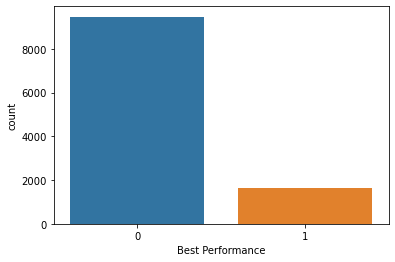

In [50]:
y = df["Best Performance"]
x = df.drop("Best Performance", axis = 1)

num_vars = x.columns[x.dtypes != 'object']
cat_vars = x.columns[x.dtypes == 'object']

sns.countplot(y)

<AxesSubplot:>

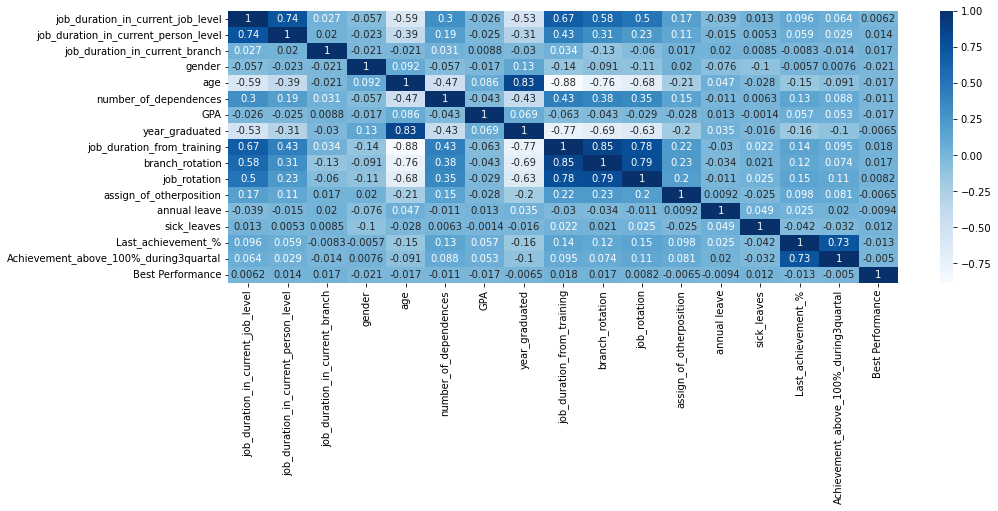

In [51]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [53]:
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

transformer = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_vars),
        ('cat', cat_transformer, cat_vars)
    ], remainder='passthrough')
pipeline_rf = Pipeline(steps=[('transformer', transformer)])
pipeline_rf.fit(x)
x_trans = pipeline_rf.transform(x)

In [54]:
x

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2.86,2011,4,2,3,2,3,0,46.37,0
1,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,0.00,1989,28,10,9,6,2,1,40.73,0
2,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,0.00,1987,29,11,6,0,4,10,47.42,0
3,JG05,2.828427,PG06,2.121320,1.118034,RM_type_A,1,1971,Y,3,...,0.00,1990,28,7,9,4,0,0,48.46,0
4,JG05,2.828427,PG06,2.345208,2.102380,RM_type_A,1,1969,Y,2,...,0.00,1988,29,8,6,2,8,0,60.38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11095,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,...,3.33,2016,4,3,3,0,4,1,50.87,0
11096,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,...,3.00,2015,3,1,2,0,6,0,79.91,0
11097,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,...,3.48,2017,2,1,2,0,4,0,78.38,0
11098,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,...,3.53,2012,5,5,4,0,4,1,85.94,1


In [55]:
x_trans

array([[-0.18268204,  0.01541912,  1.67496055, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.64972129,  2.99545249,  1.79114708, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.26479771, -1.08435728,  0.84336172, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.40648093, -0.28322013,  0.84336172, ...,  0.        ,
         0.        ,  1.        ],
       [-0.73109354, -0.71638613, -2.4830336 , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.26479771,  2.41136072,  1.05329907, ...,  0.        ,
         0.        ,  1.        ]])

In [86]:
comb = SMOTEENN(random_state = 10)
comb1 = SMOTETomek(random_state = 10)
over = SMOTE(random_state = 10,sampling_strategy=0.5)
bover = BorderlineSMOTE(random_state = 10, sampling_strategy=0.5, k_neighbors=2)
adsover = ADASYN(random_state = 10, sampling_strategy=0.5, n_neighbors=8)
under = RandomUnderSampler(random_state = 10, sampling_strategy=0.8)
balancing = pline(steps=[('over', over), ('under', under)])
x_bal, y_bal = balancing.fit_resample(x_trans, y)

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Best Performance', ylabel='count'>

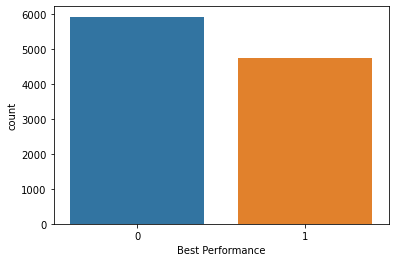

In [87]:
sns.countplot(y_bal)

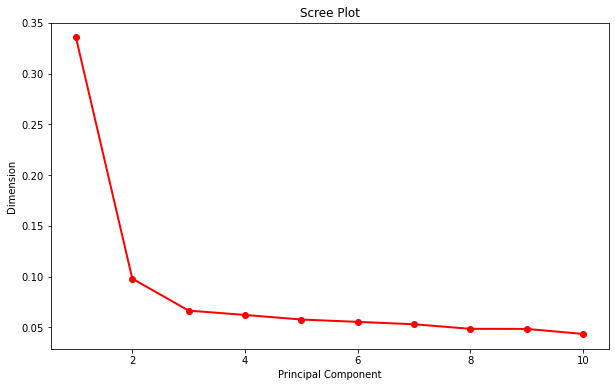

array([3.35566485e-01, 9.79848214e-02, 6.65586829e-02, 6.22686007e-02,
       5.77848793e-02, 5.54458586e-02, 5.31116317e-02, 4.85975960e-02,
       4.85231502e-02, 4.35375214e-02, 2.38722171e-02, 1.99391433e-02,
       1.55280848e-02, 1.41618554e-02, 1.29612187e-02, 1.08982785e-02,
       1.02701369e-02, 8.49181550e-03, 5.25418464e-03, 2.99663979e-03,
       2.37939586e-03, 2.05336241e-03, 6.26340015e-04, 4.15544688e-04,
       3.39520593e-04, 1.92462026e-04, 1.09907261e-04, 7.86488988e-05,
       2.72923774e-05, 1.28688708e-05, 6.47384088e-06, 5.38180213e-06,
       6.61788202e-32, 1.54589656e-32, 1.67968548e-33, 1.67968548e-33,
       1.67968548e-33, 1.16558069e-33])

In [63]:
from sklearn.decomposition import PCA

transformer_pca = PCA()
transformer_pca.fit(x_bal)

percentage_variance_pca=transformer_pca.explained_variance_ratio_[:10]
figure=plt.figure(figsize=(10,6))
sing_vals_pca=np.arange(len(percentage_variance_pca)) + 1
plt.plot(sing_vals_pca,percentage_variance_pca, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Dimension') 
plt.show()

transformer_pca.explained_variance_ratio_

In [69]:
reduced_x_pca=transformer_pca.transform(x_bal)
trans_red_x_pca=reduced_x_pca[:,0:3]

In [70]:
trans_red_x_pca

array([[-0.8531415 ,  0.80448156,  0.78476967],
       [-2.46916252,  0.03725067, -0.14511047],
       [ 0.54649023,  0.105521  , -0.73827901],
       ...,
       [-1.05728485,  0.27578265,  0.34607393],
       [-1.51649827,  1.43714801,  1.06925613],
       [-1.41845917,  0.78754736,  1.02922547]])

# Text Preprocessing

In [71]:
import pandas as pd
import re
import nltk
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemover
from Sastrawi.StopWordRemover.StopWordRemoverFactory import ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [72]:
df = pd.read_excel('D:/Komputasi Statistika 2/Preprocessing/contoh teks preproces.xlsx',header=0)
df

,ID,label,tanggal,judul,judul_clean,narasi,narasi_clean,nama file gambar
0,71,1,2020-08-17 00:00:00,Pemakaian Masker Menyebabkan Penyakit Legionna...,pakai masker sakit legionnaires,A caller to a radio talk show recently shared ...,a caller to radio talk show recently shared th...,71.jpg
1,461,1,2020-07-17 00:00:00,Instruksi Gubernur Jateng tentang penilangan ...,instruksi gubernur jateng tilang yg masker muk...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,yth seluruh anggota grup sesuai instruksi gube...,461.png
2,495,1,2020-07-13 00:00:00,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,foto jim rohn jokowi presiden baik dlm sejarah...,Jokowi adalah presiden terbaik dlm sejarah ban...,jokowi presiden baik dlm sejarah bangsa jim ro...,495.png
3,550,1,2020-07-08 00:00:00,"ini bukan politik, tapi kenyataan Pak Jokowi b...",bukan politik nyata pak jokowi hasil pulang tr...,"Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",maaf mas mbak bukan politik nyata pak jokowi h...,550.png
4,681,1,2020-06-24 00:00:00,Foto Kadrun kalo lihat foto ini panas dingin,foto kadrun kalo lihat foto panas dingin,Kadrun kalo lihat foto ini panas dingin . .,kadrun kalo lihat foto panas dingin,681.jpg
...,...,...,...,...,...,...,...,...
4226,999287,1,2016-01-17 00:00:00,: KPK Dilarang Membawa Brimob Bersenjata Masuk...,kpk larang bawa brimob senjata masuk gedung dpr,KPK Dilarang Membawa Brimob Bersenjata Masuk G...,kpk larang bawa brimob senjata masuk gedung dpr,999287.jpg
4227,999472,1,2020-08-20 00:00:00,Foto pejabat keuangan dibawah palu arit,foto jabat uang bawah palu arit,Jangan mau dialihkan kepada pakaian adat… FOKU...,jangan mau alih kepada pakai adat fokus ke pad...,999472.png
4228,999501,1,2020-08-17 00:00:00,Gambar Denny Siregar Musuh Warga Tasikmalaya d...,gambar denny siregar musuh warga tasikmalaya b...,Akhir nya bisa terkenal bang denny,akhir nya bisa kenal bang denny,999501.jpg
4229,999848,1,2020-07-21 00:00:00,Kaesang: Bapak Saya dengan Kesederhaan Bisa Ni...,kaesang bapak dengan kesederhaan nipu rakyat k...,Bapak Saya dengan Kesederhaan Bisa Nipu Rakyat...,bapak saya dengan kesederhaan bisa nipu rakyat...,999848.jpg


In [73]:
# Preprocessing
x1 = df.judul

documents = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()

for sen in range(0, len(x1)):
    # Remove URL
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','', str(x1[sen]))
    text = re.sub(r'#([^\s]+)', '', text)

    # Remove all the special characters
    document = re.sub(r'\W', ' ', text)
    
    # remove all single characters
    document1 = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document2 = re.sub(r'\^[a-zA-Z]\s+', ' ', document1) 
    
    # Remove numeric
    document3 = re.sub(r"\d+", "", document2)
    
    # Substituting multiple spaces with single space
    document4 = re.sub(r'\s+', ' ', document3, flags=re.I)
    
    # Converting to Lowercase
    document5 = document4.lower()

    #document6 = [stemmer.stem(word) for word in document5]
    document6 = stemmer.stem(document5)
    
    documents.append(document6)

x1_v1 = documents
x1_v1

['pakai masker sebab sakit legionnaires',
 'instruksi gubernur jateng tentang tilang bagi yg tidak masker di muka umum rp guna tilang via apps pikobar',
 'foto jim rohn jokowi adalah presiden baik dlm sejarah bangsa indonesia',
 'ini bukan politik tapi nyata pak jokowi hasil pulang triliun uang negara dari swiss',
 'foto kadrun kalo lihat foto ini panas dingin',
 'event promo smartphone jne spesial di bulan juni',
 'mereka sudah siap diri dengan baik untuk kuasa negri ini',
 'foto presiden italia menang karena tak cukup lahan untuk kubur an korban corona per hari',
 'kapolres timor tengah utara nusa tenggara timur beri klarifikasi kait video polisi diam korban celaka',
 'video polisi china telah aniaya wanita uighur leher di cekik pake kaki',
 'akhir jokowi sedia undur diri',
 'info jalur rawan begal dan himbauan untuk tidak keluar malam oleh kapolres cianjur',
 'dirut pt agung podomoro land cosmas batubara tinggal dunia',
 'sby sudah telepon moeldoko suruh jokowi aku kalah',
 'foto an

In [74]:
stop_factory = StopWordRemoverFactory().get_stop_words()
stop_factory

['yang',
 'untuk',
 'pada',
 'ke',
 'para',
 'namun',
 'menurut',
 'antara',
 'dia',
 'dua',
 'ia',
 'seperti',
 'jika',
 'jika',
 'sehingga',
 'kembali',
 'dan',
 'tidak',
 'ini',
 'karena',
 'kepada',
 'oleh',
 'saat',
 'harus',
 'sementara',
 'setelah',
 'belum',
 'kami',
 'sekitar',
 'bagi',
 'serta',
 'di',
 'dari',
 'telah',
 'sebagai',
 'masih',
 'hal',
 'ketika',
 'adalah',
 'itu',
 'dalam',
 'bisa',
 'bahwa',
 'atau',
 'hanya',
 'kita',
 'dengan',
 'akan',
 'juga',
 'ada',
 'mereka',
 'sudah',
 'saya',
 'terhadap',
 'secara',
 'agar',
 'lain',
 'anda',
 'begitu',
 'mengapa',
 'kenapa',
 'yaitu',
 'yakni',
 'daripada',
 'itulah',
 'lagi',
 'maka',
 'tentang',
 'demi',
 'dimana',
 'kemana',
 'pula',
 'sambil',
 'sebelum',
 'sesudah',
 'supaya',
 'guna',
 'kah',
 'pun',
 'sampai',
 'sedangkan',
 'selagi',
 'sementara',
 'tetapi',
 'apakah',
 'kecuali',
 'sebab',
 'selain',
 'seolah',
 'seraya',
 'seterusnya',
 'tanpa',
 'agak',
 'boleh',
 'dapat',
 'dsb',
 'dst',
 'dll',
 'dahulu

In [75]:
more_stopword = ['yg', 'jadi', 'orang', 'indonesia', 'di', 'foto', 'video', 'jokowi']
data = stop_factory + more_stopword
dictionary = ArrayDictionary(data)

In [76]:
STR = StopWordRemover(dictionary)
doc_clean = []
for sen in range(0, len(x1_v1)):
    kalimat = STR.remove(x1_v1[sen])
    doc_clean.append(kalimat)

In [77]:
doc_clean

['pakai masker sakit legionnaires',
 'instruksi gubernur jateng tilang yg masker muka umum rp tilang via apps pikobar',
 'jim rohn adalah presiden baik dlm sejarah bangsa',
 'bukan politik nyata pak hasil pulang triliun uang negara swiss',
 'kadrun kalo lihat ini panas dingin',
 'event promo smartphone jne spesial bulan juni',
 'sudah siap diri baik kuasa negri',
 'presiden italia menang tak cukup lahan kubur an korban corona per hari',
 'kapolres timor tengah utara nusa tenggara timur beri klarifikasi kait polisi diam korban celaka',
 'polisi china aniaya wanita uighur leher cekik pake kaki',
 'akhir sedia undur diri',
 'info jalur rawan begal himbauan tidak keluar malam kapolres cianjur',
 'dirut pt agung podomoro land cosmas batubara tinggal dunia',
 'sby telepon moeldoko suruh aku kalah',
 'anak rohingya siksa komunis',
 'cina punya ktp cilacap atas nama karsono',
 'fadli zon semua warga yang pilih prabowo pilpres kami usir indonesia',
 'pesan beranta undi hadiah menteri tenaga ker

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Cerrubium
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
from nltk.corpus import stopwords

In [80]:
tfidfconverter = TfidfVectorizer(max_features=400, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))

In [81]:
tfidfconverter.fit(doc_clean)

TfidfVectorizer(max_df=0.7, max_features=400, min_df=5,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [82]:
data_extr=tfidfconverter.transform(doc_clean)

In [83]:
data_extr.todense()[0]

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0